In [230]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np


In [231]:
sector = ['Electricity supply','Fuel Supply',  'Buildings','Domestic Transport', 'Industry', 'LULUCF (Agri, Waste, Others)']
emissions = [36.9,23.4, 74, 107.7,  46.9, 1.4]
sub_sectors = ['Residential', 'Commercial', 'Public Sector', 'Other']
sub_sector_values= [52,13,8.6,0.4]
total_emissions = sum(emissions)
print(f"Total_emissions = {round(total_emissions,2 ) } MtCO2e")


Total_emissions = 290.3 MtCO2e


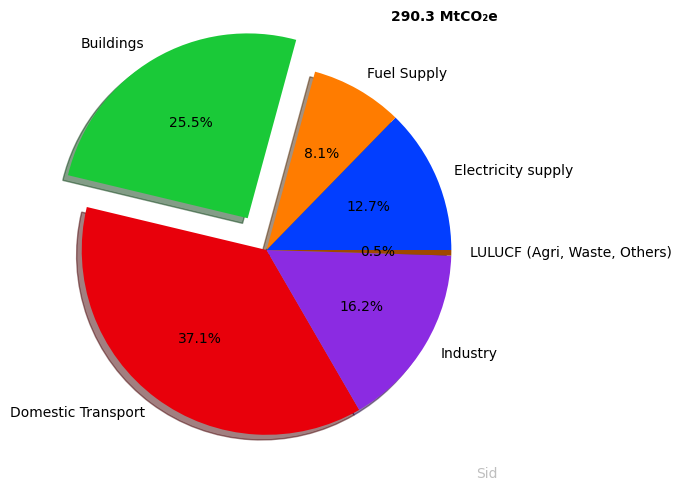

In [232]:
plt.figure(figsize=(6,6))
palette = sns.color_palette('bright', len(emissions))
plt.pie(emissions, labels=sector, explode=[0,0,0.2,0,0,0],colors=palette, shadow=True, autopct='%.01f%%' )
ax = plt.gca()
ax.text(1, 1.02, "290.3 MtCO₂e", transform=ax.transAxes, ha='right', va='top', fontweight='bold')

ax.text(1, 0, "Sid", transform=ax.transAxes,ha='right', va='bottom',fontweight='light',color='grey', alpha=0.5)
plt.show()

In [233]:
df=pd.read_excel('hnpd-2025-q1.xlsx', sheet_name='HNPD')
df.head(5)

,Ref ID,Record Last Updated (dd/mm/yyyy),Operator (or Applicant),Site Name,"Connection to communal, district or campus heat network","New, renovation or expansion of existing heat network",Number of customer connections,"Types of Building (domestic, non domestic or mixed)",Types of buildings,Technology Type,...,Appeal Refused,Appeal Granted,Planning Permission Granted,Secretary of State - Intervened,Secretary of State - Refusal,Secretary of State - Granted,Planning Permission Expired,Under Construction,Operational,Decommissioned / Abandoned / No Application Made
0,5726,2023-06-12,Scottish Borders Council,"High Street, Earlston - Community Campus",Communal,New,3,Non Domestic,"Nursery, Medical Centre, Library",Air Source Heat Pumps,...,NaT,NaT,2022-04-28,NaN,NaN,NaN,NaT,2023-06-12,NaT,NaT
1,8281,2021-04-07,GT Energy UK Limited,Etruria Valley Geothermal Heat Plant,District,Expansion,NaN,NaN,Unspecified,Ground Source Heat Pumps,...,NaT,NaT,2021-02-18,NaN,NaN,NaN,NaT,NaT,NaT,NaT
2,8544,2022-10-17,University of York,The University Of York - Energy Centre,Campus,Expansion,NaN,Non Domestic,University,Gas Fired CHP,...,NaT,NaT,2020-10-08,NaN,NaN,NaN,NaT,NaT,NaT,NaT
3,8545,2021-11-05,The Wheler Foundation,Ledston Hall,Communal,New,10,Domestic,Residential,Gas Fired CHP,...,NaT,NaT,2020-12-04,NaN,NaN,NaN,NaT,NaT,2021-11-01,NaT
4,8546,2022-07-29,Plymouth City Council,The Guildhall - Energy centre,District,Renovation,3,Non Domestic,"Office, Town Hall",Air Source Heat Pumps,...,NaT,NaT,2021-03-11,NaN,NaN,NaN,NaT,NaT,NaT,NaT


In [234]:
df.shape

(1227, 56)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 56 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   Ref ID                                                   1227 non-null   int64         
 1   Record Last Updated (dd/mm/yyyy)                         1227 non-null   datetime64[ns]
 2   Operator (or Applicant)                                  1227 non-null   object        
 3   Site Name                                                1227 non-null   object        
 4   Connection to communal, district or campus heat network  1224 non-null   object        
 5   New, renovation or expansion of existing heat network    1223 non-null   object        
 6   Number of customer connections                           1130 non-null   object        
 7   Types of Building (domestic, non domestic or mixed)

In [236]:
df.columns = df.columns.str.strip()

In [237]:
df.isna().sum()

Ref ID                                                        0
Record Last Updated (dd/mm/yyyy)                              0
Operator (or Applicant)                                       0
Site Name                                                     0
Connection to communal, district or campus heat network       3
New, renovation or expansion of existing heat network         4
Number of customer connections                               97
Types of Building (domestic, non domestic or mixed)          26
Types of buildings                                            7
Technology Type                                               0
Secondary plant technology                                 1052
Third plant technology                                     1224
Backup plant technology                                    1142
Installed Capacity (MWelec)                                1072
Primary Fuel type                                            19
Heat Source                             

Many null values exist in the dataset, and removing the associated data points would make the dataset unusable.Analysing the development status might yield better results. 

In [238]:
df['Development Status'].unique()

array(['Under Construction', 'Planning Permission Granted', 'Operational',
       'Planning Application Withdrawn', 'Abandoned',
       'No Application Required', 'Planning Application Submitted',
       'Appeal Granted', 'Planning Permission Refused', 'Revised',
       'Planning Permission Granted ', 'Appeal Refused', 'Revised '],
      dtype=object)

'Planning Application Withdrawn', 'Abandoned', 'Planning Permission Refused', 'Appeal Refused'categories are not needed as we analyse only the operational sites and sites with development potential. These categories should be cleared. 

In [239]:
mask = df['Development Status'].isin(['Planning Application Withdrawn', 'Abandoned', 'Planning Permission Refused', 'Appeal Refused'])
mask.value_counts()

Development Status
False    1116
True      111
Name: count, dtype: int64

111 datapoints in the feature Development status contain 'Planning Application Withdrawn', 'Abandoned', 'Planning Permission Refused', 'Appeal Refused'. Its better to remove all these. 

In [240]:
op_hns = df[~ mask]
op_hns.shape

(1116, 56)

In [241]:
op_hns.fillna(value='None', axis=0, inplace=True)
op_hns.isnull().sum()

Ref ID                                                     0
Record Last Updated (dd/mm/yyyy)                           0
Operator (or Applicant)                                    0
Site Name                                                  0
Connection to communal, district or campus heat network    0
New, renovation or expansion of existing heat network      0
Number of customer connections                             0
Types of Building (domestic, non domestic or mixed)        0
Types of buildings                                         0
Technology Type                                            0
Secondary plant technology                                 0
Third plant technology                                     0
Backup plant technology                                    0
Installed Capacity (MWelec)                                0
Primary Fuel type                                          0
Heat Source                                                0
Temperature of heat supp

I wanna see how long this process has been going on and the rate of development of heatnetworks in the uk. Suitable feature would be 'Record last updated'

In [242]:
op_hns['Record Last Updated (dd/mm/yyyy)']

0      2023-06-12
1      2021-04-07
2      2022-10-17
3      2021-11-05
4      2022-07-29
          ...    
1222   2025-03-28
1223   2025-03-31
1224   2025-03-31
1225   2025-03-31
1226   2025-03-31
Name: Record Last Updated (dd/mm/yyyy), Length: 1116, dtype: datetime64[ns]

the years seem to mixed up, unsorted, creating a new column with the years would yield good results. already its in datetime format making my life easy

In [243]:
sorted_df = op_hns.sort_values(by='Record Last Updated (dd/mm/yyyy)').reset_index(drop=True)
sorted_df.head()

,Ref ID,Record Last Updated (dd/mm/yyyy),Operator (or Applicant),Site Name,"Connection to communal, district or campus heat network","New, renovation or expansion of existing heat network",Number of customer connections,"Types of Building (domestic, non domestic or mixed)",Types of buildings,Technology Type,...,Appeal Refused,Appeal Granted,Planning Permission Granted,Secretary of State - Intervened,Secretary of State - Refusal,Secretary of State - Granted,Planning Permission Expired,Under Construction,Operational,Decommissioned / Abandoned / No Application Made
0,8608,2021-03-10,Leep Holdings (Utilities) Limited,Media City Heat and Power Network,Campus,New,1,Non Domestic,Office,Gas Fired CHP,...,None,None,None,None,None,None,None,None,2020-01-01 00:00:00,None
1,8584,2021-03-10,Leeds City Council,Leeds PIPES - City Centre (Phase 2),District,New,236,Mixed,"Residential, Office",EfW Incineration,...,None,None,None,None,None,None,None,None,None,None
2,8576,2021-03-11,London Square,London Square Bermondsey,District,New,409,Mixed,"Residential, Office, Retail",Gas Fired CHP,...,None,None,2016-12-07 00:00:00,None,None,None,None,None,None,None
3,8550,2021-03-15,South West London and St Georges NHS Trust,Springfield Hospital,District,New,None,Non Domestic,Hospital,Gas Fired CHP,...,None,None,2012-06-20 00:00:00,None,None,None,None,None,None,None
4,8559,2021-03-15,Taylor Wimpey,"Osiers Road, Wandsworth",Communal,New,109,Domestic,Residential,Gas Boiler,...,None,None,None,None,None,None,None,None,None,None


although heat networks date long back, suitable records are available since 2021. It doesnt mean these HN's became operational only in 2021. Lets create another column Year.

In [244]:
sorted_df['year']=sorted_df['Record Last Updated (dd/mm/yyyy)'].dt.year
sorted_df.head(5)

,Ref ID,Record Last Updated (dd/mm/yyyy),Operator (or Applicant),Site Name,"Connection to communal, district or campus heat network","New, renovation or expansion of existing heat network",Number of customer connections,"Types of Building (domestic, non domestic or mixed)",Types of buildings,Technology Type,...,Appeal Granted,Planning Permission Granted,Secretary of State - Intervened,Secretary of State - Refusal,Secretary of State - Granted,Planning Permission Expired,Under Construction,Operational,Decommissioned / Abandoned / No Application Made,year
0,8608,2021-03-10,Leep Holdings (Utilities) Limited,Media City Heat and Power Network,Campus,New,1,Non Domestic,Office,Gas Fired CHP,...,None,None,None,None,None,None,None,2020-01-01 00:00:00,None,2021
1,8584,2021-03-10,Leeds City Council,Leeds PIPES - City Centre (Phase 2),District,New,236,Mixed,"Residential, Office",EfW Incineration,...,None,None,None,None,None,None,None,None,None,2021
2,8576,2021-03-11,London Square,London Square Bermondsey,District,New,409,Mixed,"Residential, Office, Retail",Gas Fired CHP,...,None,2016-12-07 00:00:00,None,None,None,None,None,None,None,2021
3,8550,2021-03-15,South West London and St Georges NHS Trust,Springfield Hospital,District,New,None,Non Domestic,Hospital,Gas Fired CHP,...,None,2012-06-20 00:00:00,None,None,None,None,None,None,None,2021
4,8559,2021-03-15,Taylor Wimpey,"Osiers Road, Wandsworth",Communal,New,109,Domestic,Residential,Gas Boiler,...,None,None,None,None,None,None,None,None,None,2021


In [245]:
no_hns_year = sorted_df['year'].value_counts()
no_hns_year.sort_index()


year
2021    113
2022    284
2023    213
2024    318
2025    188
Name: count, dtype: int64

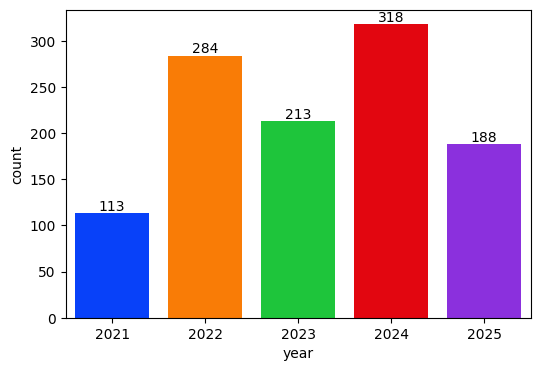

In [246]:
plt.figure(figsize=(6,4))
ax=sns.countplot(sorted_df, x='year', palette='bright', saturation=0.95)
for container in ax.containers:
    ax.bar_label(container,color='black',size=10)
plt.show()

I remember seeing a feature 'Technology type'. lets see the type of technology updated in the records each year.

In [247]:
sorted_df['Technology Type'].unique()

array(['Gas Fired CHP', 'EfW Incineration', 'Gas Boiler',
       'Air Source Heat Pumps', 'Biomass (dedicated)',
       'Ground Source Heat Pumps', 'Water Source Heat Pumps',
       'Biofuel CHP', 'Advanced Conversion Technologies', 'Unknown',
       'Ammonia-liquid Heat Pump', 'Battery', 'Geothermal ',
       'Oil Fired Boilers'], dtype=object)

Thats a lot of tech. Amazed by the fact that Battery, Ammonia-liquid Heat Pumps are found in the list. 


In [248]:
new_tech = sorted_df[sorted_df['Technology Type'].isin(['Ammonia-liquid Heat Pump', 'Battery'])]
new_tech

,Ref ID,Record Last Updated (dd/mm/yyyy),Operator (or Applicant),Site Name,"Connection to communal, district or campus heat network","New, renovation or expansion of existing heat network",Number of customer connections,"Types of Building (domestic, non domestic or mixed)",Types of buildings,Technology Type,...,Appeal Granted,Planning Permission Granted,Secretary of State - Intervened,Secretary of State - Refusal,Secretary of State - Granted,Planning Permission Expired,Under Construction,Operational,Decommissioned / Abandoned / No Application Made,year
549,13452,2023-09-26,Nottingham University Hospitals NHS Trust,Queens Medical Centre - Energy Centre,Campus,Renovation,1,Non Domestic,Hospital,Ammonia-liquid Heat Pump,...,None,2023-09-19 00:00:00,None,None,None,2026-09-19 00:00:00,None,None,None,2023
658,15833,2024-02-13,Mid Kent College,"Mid Kent College Medway Campus, Medway Road - ...",Campus,New,1,Non Domestic,College,Battery,...,None,2023-11-23 00:00:00,None,None,None,2026-11-23 00:00:00,None,None,None,2024


In [249]:
new_tech['Installed Capacity (MWelec)']

549    None
658       1
Name: Installed Capacity (MWelec), dtype: object

In [250]:
tech = sorted_df['Technology Type'].value_counts()
tech

Technology Type
Air Source Heat Pumps               698
Gas Fired CHP                       159
Ground Source Heat Pumps             81
Biomass (dedicated)                  44
EfW Incineration                     39
Gas Boiler                           38
Unknown                              29
Water Source Heat Pumps              20
Biofuel CHP                           2
Advanced Conversion Technologies      2
Ammonia-liquid Heat Pump              1
Battery                               1
Geothermal                            1
Oil Fired Boilers                     1
Name: count, dtype: int64

In [251]:
tech_index = tech.index
tech_values = tech.values

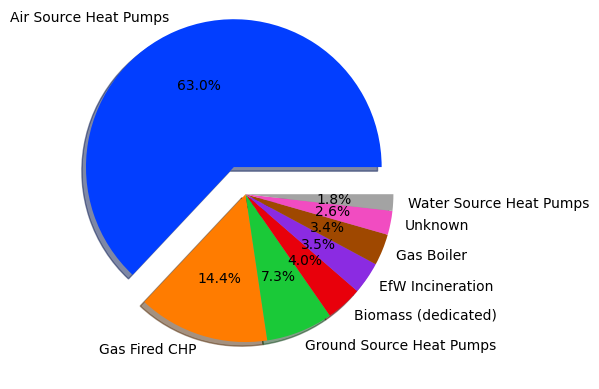

In [252]:
tech_type = tech.head(8).index
tech_values = tech.head(8).values
palette = sns.color_palette('bright', len(tech_type))
plt.pie(x=tech_values, labels=tech_type, explode=[0.2,0,0,0,0,0,0,0], shadow=True, colors=palette, autopct='%.01f%%')
plt.show()


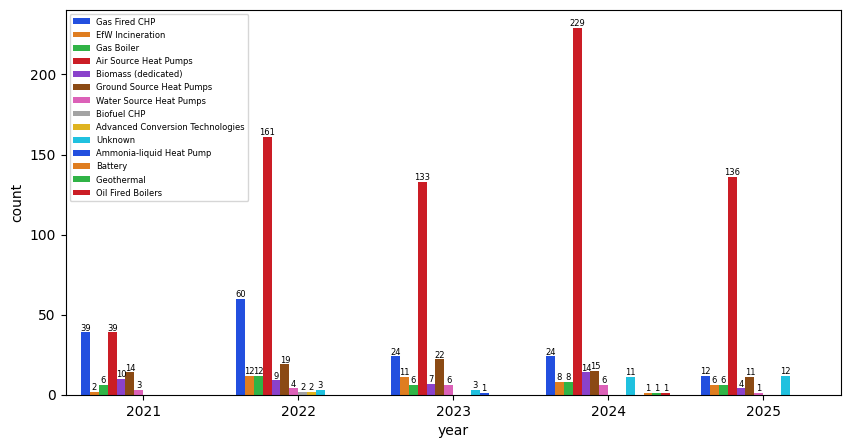

In [253]:
plt.figure(figsize=(10,5))
style = sns.color_palette("bright", 14)
ax=sns.countplot(sorted_df, x='year', hue= 'Technology Type', palette= style)
for container in ax.containers:
    ax.bar_label(container,color='black',size=6)
ax.legend(prop={'size':6}, loc='upper left')
   
plt.show()

In [254]:
sorted_df['Connection to communal, district or campus heat network'].value_counts()

Connection to communal, district or campus heat network
Communal       552
District       378
Campus         182
None             3
Unspecified      1
Name: count, dtype: int64

In [255]:
district_df = sorted_df[sorted_df['Connection to communal, district or campus heat network']=='District']
communal_df= sorted_df[sorted_df['Connection to communal, district or campus heat network']=='Communal']
campus_df = sorted_df[sorted_df['Connection to communal, district or campus heat network']=='Campus']
print(district_df.shape, communal_df.shape, campus_df.shape)

(378, 57) (552, 57) (182, 57)


In [256]:
top_3_connections = sorted_df['Connection to communal, district or campus heat network'].value_counts().head(3)
top_3_connections

Connection to communal, district or campus heat network
Communal    552
District    378
Campus      182
Name: count, dtype: int64

Campus has only one connection, mostly which is a school or university or hospital. So, Im ommiting campus from number of connection plots.

In [257]:
top_2_connections= sorted_df['Connection to communal, district or campus heat network'].value_counts().head(2).index.to_list()
top_2_connections


['Communal', 'District']

In [258]:
filtered_df = sorted_df[sorted_df['Connection to communal, district or campus heat network'].isin(top_2_connections)]
filtered_df.shape


(930, 57)

There is a String 'None' in 'length of connection in m' - Got to make sure I clear this out before plotting.


In [259]:
filtered_df = filtered_df[filtered_df['Length of distribution network in m']!='None']
filtered_df.shape

(30, 57)

No of datapoints just jumped from 1112 to 39. Thats alright. Lets find a result with the avaialble data

In [260]:
filtered_df['Length of distribution network in m'].replace(r'^\s*$', np.nan, regex=True, inplace=True)
filtered_df = filtered_df[filtered_df['Length of distribution network in m'].notna()]
filtered_df['Length of distribution network in m']

1       5000.00
47       356.00
99      2000.00
129     1037.00
130     1037.00
220      650.00
265     5954.57
268     2700.00
274      180.00
400     2000.00
406     4600.00
408      300.00
536      240.00
578      700.00
620        2.00
642     5000.00
690      547.00
706      750.00
737     1200.00
763     7500.00
764      143.00
797      462.00
870      618.00
885     5000.00
903     6500.00
969     6614.00
1002     685.00
1071    5000.00
Name: Length of distribution network in m, dtype: float64

In [261]:
sorted_df['Number of customer connections'].nunique()

360

In [262]:
sorted_df['Number of customer connections'].unique()

array([1, 236, 409, 'None', 109, 3, 74, 156, 1191, 897, 69, 415, 93, 142,
       194, 386, 639, 174, 740, 71, 113, 82, 1251, 471, 12, 681, 66, 25,
       655, 9, 346, 288, 377, 37, 131, 121, 46, 10, 41, 32, 5, 83, 8, 19,
       783, 58, 20, 2, 13, 91, 60, 7, 120, 59, 86, 90, 226, 167, 147, 56,
       1506, 15, 6, 50, 206, 253, 518, 300, 349, 1215, 496, 84, 14, 17,
       129, 192, 154, 647, 39, 183, 67, 54, 343, 200, 916, 250, 49, 442,
       412, 26, 63, 70, 76, 235, 45, 417, 245, 24, 260, 118, 182, 75, 23,
       197, 47, 702, 42, 186, 179, 438, 160, 867, 322, 357, 222, 96, 139,
       252, 525, 563, 202, 358, 153, 582, 18, 286, 795, 1008, 950, 1234,
       299, 148, 263, 43, 30, 728, 28, 599, 500, 134, 367, 21, 40, 22, 92,
       312, 328, 73, 540, 44, 193, 225, 11, 105, 2269, 80, 472, 185, 52,
       380, 16, 189, 88, 98, 256, 215, 119, 53, 209, 115, 230, 326, 106,
       190, 4, 31, 1400, 97, 1153, 103, 29, 1458, 135, 699, 33, 348, 162,
       159, 353, 439, 262, 95, 679, 116, 112

In [263]:
sorted_df['Number of customer connections'] = (sorted_df['Number of customer connections'].astype(str).str.replace(r'\s+', '', regex=True))
sorted_df['Number of customer connections'] = pd.to_numeric(sorted_df['Number of customer connections'],errors='coerce')
sorted_df = sorted_df[sorted_df['Number of customer connections'].notna()]
sorted_df['Number of customer connections'] = sorted_df['Number of customer connections'].astype(int)
sorted_df['Number of customer connections'].unique()


array([   1,  236,  409,  109,    3,   74,  156, 1191,  897,   69,  415,
         93,  142,  194,  386,  639,  174,  740,   71,  113,   82, 1251,
        471,   12,  681,   66,   25,  655,    9,  346,  288,  377,   37,
        131,  121,   46,   10,   41,   32,    5,   83,    8,   19,  783,
         58,   20,    2,   13,   91,   60,    7,  120,   59,   86,   90,
        226,  167,  147,   56, 1506,   15,    6,   50,  206,  253,  518,
        300,  349, 1215,  496,   84,   14,   17,  129,  192,  154,  647,
         39,  183,   67,   54,  343,  200,  916,  250,   49,  442,  412,
         26,   63,   70,   76,  235,   45,  417,  245,   24,  260,  118,
        182,   75,   23,  197,   47,  702,   42,  186,  179,  438,  160,
        867,  322,  357,  222,   96,  139,  252,  525,  563,  202,  358,
        153,  582,   18,  286,  795, 1008,  950, 1234,  299,  148,  263,
         43,   30,  728,   28,  599,  500,  134,  367,   21,   40,   22,
         92,  312,  328,   73,  540,   44,  193,  2

In [264]:
filtered_without_campus = sorted_df[sorted_df['Connection to communal, district or campus heat network'].isin(top_2_connections)]
filtered_without_campus.head(5)

,Ref ID,Record Last Updated (dd/mm/yyyy),Operator (or Applicant),Site Name,"Connection to communal, district or campus heat network","New, renovation or expansion of existing heat network",Number of customer connections,"Types of Building (domestic, non domestic or mixed)",Types of buildings,Technology Type,...,Appeal Granted,Planning Permission Granted,Secretary of State - Intervened,Secretary of State - Refusal,Secretary of State - Granted,Planning Permission Expired,Under Construction,Operational,Decommissioned / Abandoned / No Application Made,year
1,8584,2021-03-10,Leeds City Council,Leeds PIPES - City Centre (Phase 2),District,New,236,Mixed,"Residential, Office",EfW Incineration,...,None,None,None,None,None,None,None,None,None,2021
2,8576,2021-03-11,London Square,London Square Bermondsey,District,New,409,Mixed,"Residential, Office, Retail",Gas Fired CHP,...,None,2016-12-07 00:00:00,None,None,None,None,None,None,None,2021
4,8559,2021-03-15,Taylor Wimpey,"Osiers Road, Wandsworth",Communal,New,109,Domestic,Residential,Gas Boiler,...,None,None,None,None,None,None,None,None,None,2021
6,8826,2021-03-17,BCBC - Sustainable Development,Bridgend Life Centre - District Heat Network E...,District,New,3,Non Domestic,"Office, Leisure Centre, Community Hub",Gas Fired CHP,...,None,None,None,None,None,None,None,None,None,2021
7,8679,2021-03-22,Audley St Elphins Limited,Audley Retirement Village - Block M,District,New,74,Domestic,Care Village,Gas Fired CHP,...,None,2019-04-29 00:00:00,None,None,None,None,None,None,None,2021


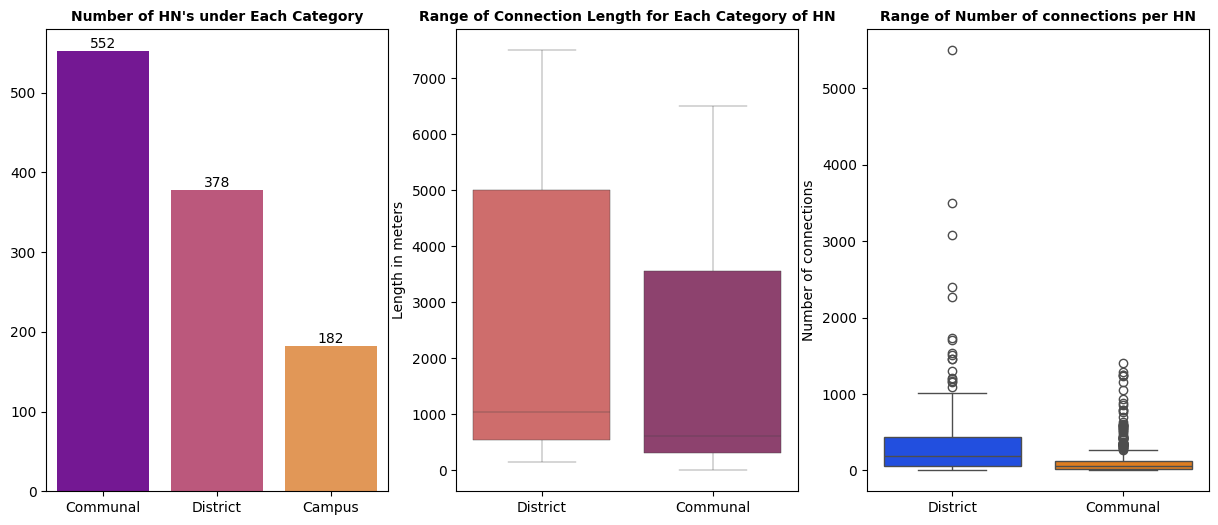

In [265]:
fig,axes = plt.subplots(1,3,figsize=(15,6))
sns.barplot(x=top_3_connections.index, y=top_3_connections.values, ax=axes[0], palette='plasma')
for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10, color='black')
axes[0].set_title("Number of HN's under Each Category", size=10, weight='bold')
axes[0].set_xlabel(None)
axes[0].set_ylabel(None)



sns.boxplot(filtered_df, x='Connection to communal, district or campus heat network', y='Length of distribution network in m', palette='flare', linewidth=0.3, ax=axes[1])
axes[1].set_title("Range of Connection Length for Each Category of HN", size=10, weight='bold')
axes[1].set_xlabel(None)
axes[1].set_ylabel('Length in meters')

sns.boxplot(data=filtered_without_campus, x='Connection to communal, district or campus heat network', y='Number of customer connections', palette='bright', ax=axes[2])
axes[2].set_title("Range of Number of connections per HN", size=10, weight='bold')
axes[2].set_xlabel(None)
axes[2].set_ylabel('Number of connections')
plt.show()
    

In [266]:

district_df['Length of distribution network in m'] = district_df['Length of distribution network in m'].astype(str).str.replace(r'\s+', '', regex=True)
district_df['Length of distribution network in m'] = pd.to_numeric(district_df['Length of distribution network in m'],errors='coerce')
district_df = district_df[district_df['Length of distribution network in m'].notna()]
district_df['Length of distribution network in m'].replace('None',0, inplace=True)
district_df['Length of distribution network in m'] = district_df['Length of distribution network in m'].astype(int)

communal_df['Length of distribution network in m'] = communal_df['Length of distribution network in m'].astype(str).str.replace(r'\s+', '', regex=True)
communal_df['Length of distribution network in m'] = pd.to_numeric(communal_df['Length of distribution network in m'],errors='coerce')
communal_df = communal_df[communal_df['Length of distribution network in m'].notna()]
communal_df['Length of distribution network in m'].replace('None',0, inplace=True)
communal_df['Length of distribution network in m'] = communal_df['Length of distribution network in m'].astype(int)

campus_df['Length of distribution network in m'] = campus_df['Length of distribution network in m'].astype(str).str.replace(r'\s+', '', regex=True)
campus_df['Length of distribution network in m'] = pd.to_numeric(campus_df['Length of distribution network in m'],errors='coerce')
campus_df = campus_df[campus_df['Length of distribution network in m'].notna()]
campus_df['Length of distribution network in m'].replace('None',0, inplace=True)
campus_df['Length of distribution network in m'] = campus_df['Length of distribution network in m'].astype(int)

In [267]:
district_df['Length of distribution network in m'].describe()

count      25.000000
mean     2386.200000
std      2379.785985
min       143.000000
25%       547.000000
50%      1037.000000
75%      5000.000000
max      7500.000000
Name: Length of distribution network in m, dtype: float64

In [268]:
communal_df['Length of distribution network in m'].describe()

count       3.000000
mean     2373.333333
std      3587.045767
min         2.000000
25%       310.000000
50%       618.000000
75%      3559.000000
max      6500.000000
Name: Length of distribution network in m, dtype: float64

In [269]:
campus_df['Length of distribution network in m'].describe()

count        6.000000
mean      5787.333333
std       8634.980178
min        924.000000
25%       1400.000000
50%       1700.000000
75%       5000.000000
max      23000.000000
Name: Length of distribution network in m, dtype: float64

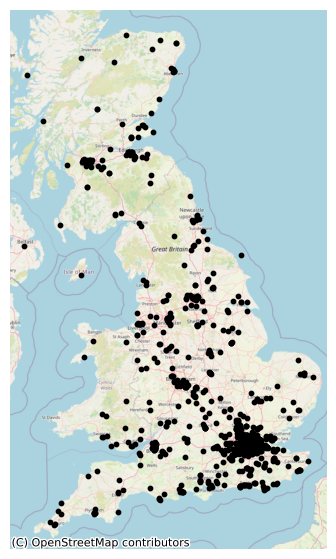

In [270]:
import geopandas as gpd
import contextily as ctx  
from shapely.geometry import Point
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['X-coordinate'], df['Y-coordinate']),
    crs='EPSG:27700' 
)
gdf_web = gdf.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(8, 7))
gdf_web.plot(ax=ax, color='black', markersize=10)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
plt.show()


In [272]:
installed_capacity = op_hns[op_hns['Installed Capacity (MWelec)']!='None'].reset_index(drop=True)
installed_capacity['Installed Capacity (MWelec)'].describe()

count     148.00
unique     87.00
top         0.15
freq       10.00
Name: Installed Capacity (MWelec), dtype: float64

In [273]:
installed_capacity['Installed Capacity (MWelec)'] = installed_capacity['Installed Capacity (MWelec)'].astype(str).str.strip()
installed_capacity['Installed Capacity (MWelec)'] = pd.to_numeric(installed_capacity['Installed Capacity (MWelec)'], errors='coerce')
installed_capacity = installed_capacity.dropna(subset=['Installed Capacity (MWelec)'])
installed_capacity['Installed Capacity (MWelec)'].describe()


count    146.000000
mean       5.726238
std       18.856438
min        0.060000
25%        0.233405
50%        0.997000
75%        3.000000
max      180.000000
Name: Installed Capacity (MWelec), dtype: float64

Installed capacity ranges from 60 kW to 180 MW. More than 50% of the registered HN's have an installed capacity of less than 1 MW

In [274]:
installed_capacity = installed_capacity.sort_values(by='Installed Capacity (MWelec)', ascending=True)
installed_capacity['Installed Capacity (MWelec)'].tail(10)

31      20.0
141     20.0
59      20.0
3       27.0
113     40.0
4       40.0
63      58.0
48      69.0
62      95.0
57     180.0
Name: Installed Capacity (MWelec), dtype: float64

This is interesting. Heating Networks with a capacity of more than 20 MW are avaialble. Lets check out the technology type for the top 10 operators with highest capacity. 

In [275]:
top10_MW= installed_capacity[['Technology Type','Installed Capacity (MWelec)']].tail(10)
top10_MW


,Technology Type,Installed Capacity (MWelec)
31,Advanced Conversion Technologies,20.0
141,Air Source Heat Pumps,20.0
59,EfW Incineration,20.0
3,Gas Fired CHP,27.0
113,EfW Incineration,40.0
4,Gas Boiler,40.0
63,EfW Incineration,58.0
48,Gas Fired CHP,69.0
62,EfW Incineration,95.0
57,Advanced Conversion Technologies,180.0


From the above table its very clear that conventional heating technologies like CHP's and gas boilers are still the preferred heating source for units with a higher capacity. What is this 'Advanced Conversion Technologies'? Lets find out

In [ ]:
top10_MW_fuel= installed_capacity[['Technology Type','Installed Capacity (MWelec)','Primary Fuel type']].tail(10)
top10_MW_fuel

,Technology Type,Installed Capacity (MWelec),Primary Fuel type
31,Advanced Conversion Technologies,20.0,Gas
141,Air Source Heat Pumps,20.0,Electric
59,EfW Incineration,20.0,Gas
3,Gas Fired CHP,27.0,Gas
113,EfW Incineration,40.0,Gas
4,Gas Boiler,40.0,Gas
63,EfW Incineration,58.0,Gas
48,Gas Fired CHP,69.0,Gas
62,EfW Incineration,95.0,Gas
57,Advanced Conversion Technologies,180.0,Gas


Gas still remains the preffered heating source. Advanced conversion technologies might be gas plants with carbon capture mechanisms put in place. 